In [ ]:
#Import neccessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

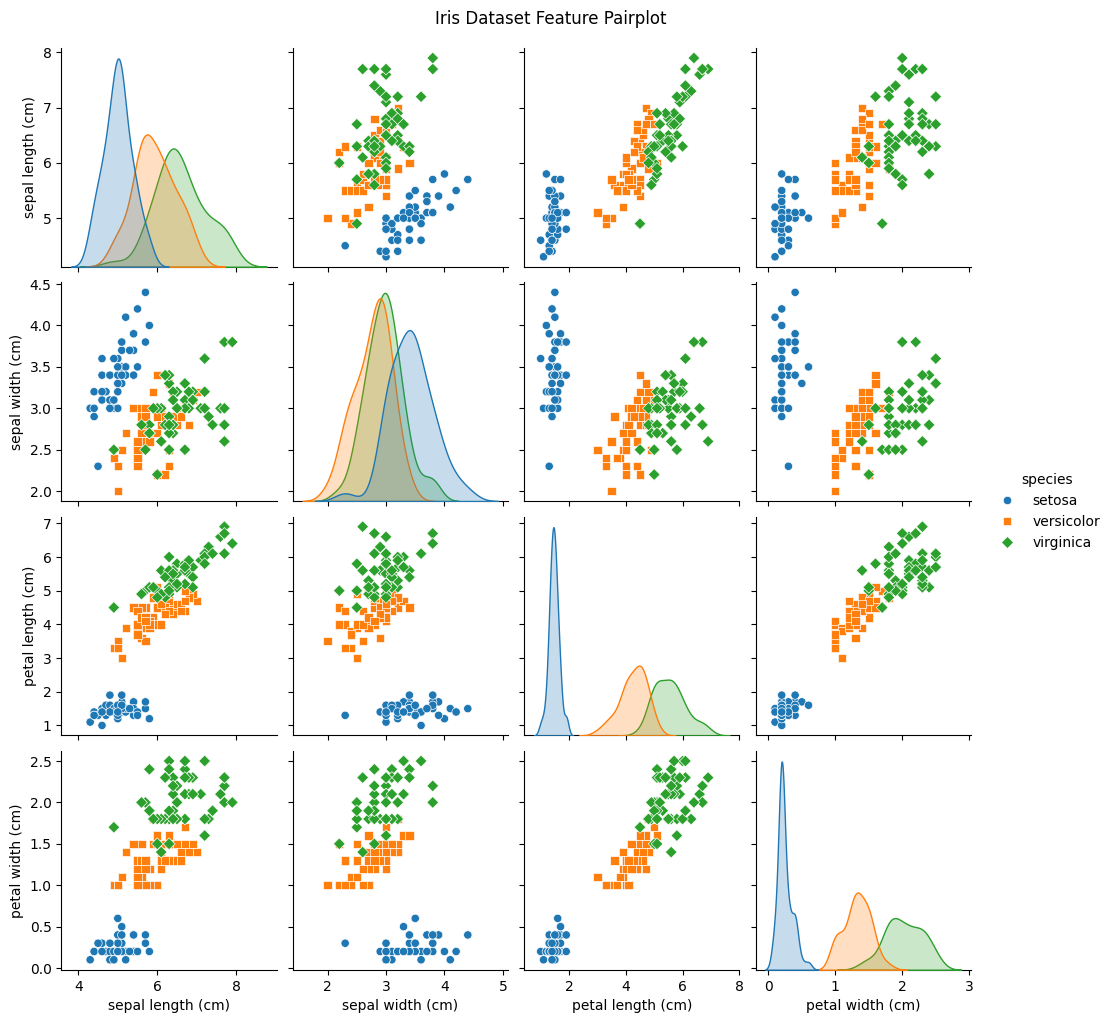

In [ ]:
#Load dataset into model

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Iris Dataset Feature Pairplot", y=1.02)
plt.show()

Accuracy on test set: 100.00%


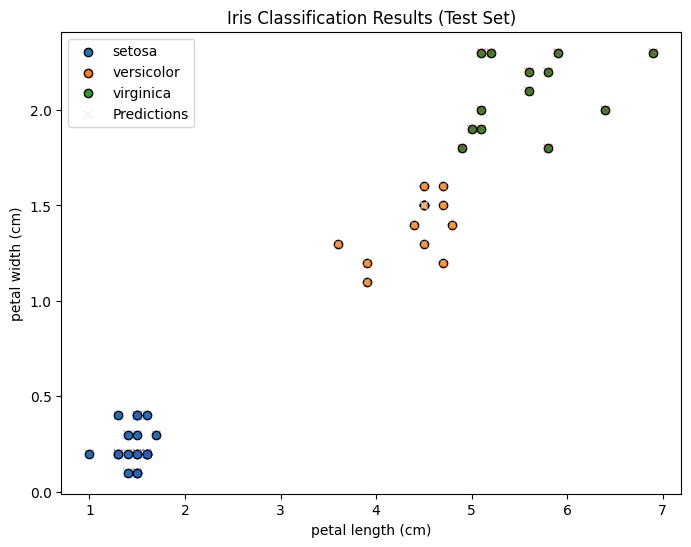

In [ ]:
#Train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)*100:.2f}%")
feature_x = 2
feature_y = 3
plt.figure(figsize=(8,6))
for species_index, species_name in enumerate(target_names):
    plt.scatter(
        X_test[y_test == species_index, feature_x],
        X_test[y_test == species_index, feature_y],
        label=species_name,
        edgecolor='k'
    )
plt.scatter(
    X_test[:, feature_x],
    X_test[:, feature_y],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.3,
    marker='x',
    label='Predictions'
)

plt.xlabel(feature_names[feature_x])
plt.ylabel(feature_names[feature_y])
plt.title('Iris Classification Results (Test Set)')
plt.legend()
plt.show()
